# objective :  Attendance Analysis:


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:/Users/USER/OneDrive - ESPRIT/Bureau/PIBI/[Human Ressources] Employee Insight Hub Unleashing Strategic HR Analytics/attendance_dataset_2023.csv")


In [20]:
data.head()


,EmployeeID,Date,StartTime,BreakTime,ResumeTime,EndTime
0,E0001,2023-01-02,08:56:00,13:15:00,14:19:00,16:11:00
1,E0001,2023-01-03,08:02:00,13:47:00,14:29:00,16:32:00
2,E0001,2023-01-04,08:04:00,12:50:00,14:59:00,16:36:00
3,E0001,2023-01-05,08:22:00,13:36:00,14:41:00,16:25:00
4,E0001,2023-01-06,08:07:00,13:28:00,14:26:00,16:57:00


In [21]:
data.shape

(189800, 6)

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189800 entries, 0 to 189799
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   EmployeeID  189800 non-null  object
 1   Date        189800 non-null  object
 2   StartTime   189800 non-null  object
 3   BreakTime   189800 non-null  object
 4   ResumeTime  189800 non-null  object
 5   EndTime     189800 non-null  object
dtypes: object(6)
memory usage: 8.7+ MB


In [23]:
data.isnull().sum()

EmployeeID    0
Date          0
StartTime     0
BreakTime     0
ResumeTime    0
EndTime       0
dtype: int64

In [24]:
data.describe().T

,count,unique,top,freq
EmployeeID,189800,1460,E0001,130
Date,189800,130,2023-01-02,1460
StartTime,189800,61,08:05:00,3271
BreakTime,189800,121,12:40:00,1676
ResumeTime,189800,61,14:39:00,3204
EndTime,189800,61,16:24:00,3255


In [25]:
# Convert date and time columns to datetime
date_columns = ['Date', 'StartTime', 'BreakTime', 'ResumeTime', 'EndTime']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Calculate total work hours and break time hours
data['TotalWorkHours'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 3600
data['BreakTimeHours'] = (data['ResumeTime'] - data['BreakTime']).dt.total_seconds() / 3600

# Convert datetime columns back to string format
for col in date_columns:
    data[col] = data[col].dt.strftime('%Y-%m-%d' if col == 'Date' else '%H:%M:%S')

# Display the modified DataFrame
data


,EmployeeID,Date,StartTime,BreakTime,ResumeTime,EndTime,TotalWorkHours,BreakTimeHours
0,E0001,2023-01-02,08:56:00,13:15:00,14:19:00,16:11:00,7.250000,1.066667
1,E0001,2023-01-03,08:02:00,13:47:00,14:29:00,16:32:00,8.500000,0.700000
2,E0001,2023-01-04,08:04:00,12:50:00,14:59:00,16:36:00,8.533333,2.150000
3,E0001,2023-01-05,08:22:00,13:36:00,14:41:00,16:25:00,8.050000,1.083333
4,E0001,2023-01-06,08:07:00,13:28:00,14:26:00,16:57:00,8.833333,0.966667
...,...,...,...,...,...,...,...,...
189795,E1460,2023-06-26,08:15:00,13:52:00,15:00:00,16:21:00,8.100000,1.133333
189796,E1460,2023-06-27,08:45:00,13:39:00,14:56:00,16:57:00,8.200000,1.283333
189797,E1460,2023-06-28,08:04:00,13:43:00,14:32:00,16:45:00,8.683333,0.816667
189798,E1460,2023-06-29,08:35:00,13:00:00,14:10:00,16:07:00,7.533333,1.166667


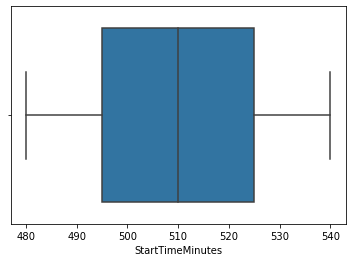

In [30]:
# Convertir la colonne StartTime en type datetime
df['StartTime'] = pd.to_datetime(df['StartTime'])

# Créer une nouvelle colonne représentant le temps écoulé depuis minuit en minutes
df['StartTimeMinutes'] = df['StartTime'].dt.hour * 60 + df['StartTime'].dt.minute

# Boxplot pour identifier les valeurs aberrantes
sns.boxplot(x='StartTimeMinutes', data=df)
plt.show()

In [32]:

# Convertir la colonne StartTime en type datetime pour effectuer des calculs plus facilement
data['StartTime'] = pd.to_datetime(data['StartTime'])

# Formater la moyenne pour afficher uniquement l'heure
moyenne_start_time_formatted = moyenne_start_time.strftime('%H:%M:%S')

# Afficher la moyenne formatée
print("La moyenne des heures de début des employés est : ", moyenne_start_time_formatted)

La moyenne des heures de début des employés est :  08:29:57


In [33]:
data['EndTime'] = pd.to_datetime(data['EndTime'])

# Calculer la moyenne des heures de fin
moyenne_end_time = data['EndTime'].mean()

# Formater la moyenne pour afficher uniquement l'heure
moyenne_end_time_formatted = moyenne_end_time.strftime('%H:%M:%S')

# Afficher la moyenne formatée
print("La moyenne des heures de fin des employés est : ", moyenne_end_time_formatted)


La moyenne des heures de fin des employés est :  16:29:58


In [40]:
data['BreakTime'] = pd.to_datetime(data['BreakTime'])
data['ResumeTime'] = pd.to_datetime(data['ResumeTime'])

# Calculer la différence entre ResumeTime et BreakTime pour obtenir la durée de la pause
data['PauseDuration'] = data['ResumeTime'] - data['BreakTime']

# Calculer la moyenne des pauses pour chaque employé
moyenne_pause_par_employe = data.groupby('EmployeeID')['PauseDuration'].mean()

# Afficher la moyenne pour chaque employé
for employee_id, moyenne_pause in moyenne_pause_par_employe.items():
    print(f"EmployeeID: {employee_id}, Moyenne des pauses : {moyenne_pause}")

EmployeeID: E0001, Moyenne des pauses : 0 days 01:33:29.538461538
EmployeeID: E0002, Moyenne des pauses : 0 days 01:30:38.307692307
EmployeeID: E0003, Moyenne des pauses : 0 days 01:26:37.384615384
EmployeeID: E0004, Moyenne des pauses : 0 days 01:29:28.153846153
EmployeeID: E0005, Moyenne des pauses : 0 days 01:31:46.615384615
EmployeeID: E0006, Moyenne des pauses : 0 days 01:24:37.846153846
EmployeeID: E0007, Moyenne des pauses : 0 days 01:30:37.384615384
EmployeeID: E0008, Moyenne des pauses : 0 days 01:26:39.230769230
EmployeeID: E0009, Moyenne des pauses : 0 days 01:27:16.153846153
EmployeeID: E0010, Moyenne des pauses : 0 days 01:27:08.307692307
EmployeeID: E0011, Moyenne des pauses : 0 days 01:31:23.538461538
EmployeeID: E0012, Moyenne des pauses : 0 days 01:28:24.461538461
EmployeeID: E0013, Moyenne des pauses : 0 days 01:24:31.846153846
EmployeeID: E0014, Moyenne des pauses : 0 days 01:29:09.230769230
EmployeeID: E0015, Moyenne des pauses : 0 days 01:35:06.923076923
EmployeeID

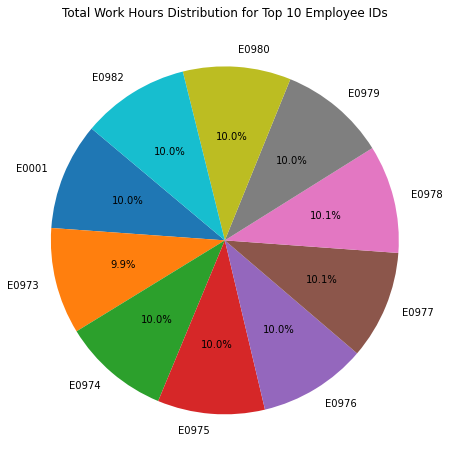

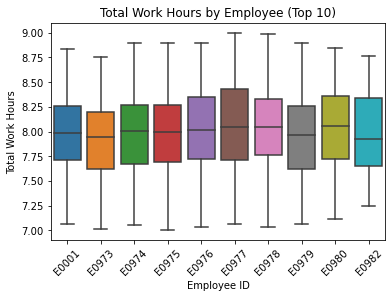

In [53]:

















# Determine top 10 most frequent EmployeeIDs
top10_employee_ids = data['EmployeeID'].value_counts().nlargest(10).index

# Filter data for top 10 EmployeeIDs
data_top10 = data[data['EmployeeID'].isin(top10_employee_ids)]

# Aggregate total work hours for each employee
total_work_hours_per_employee = data_top10.groupby('EmployeeID')['TotalWorkHours'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_work_hours_per_employee, labels=total_work_hours_per_employee.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Work Hours Distribution for Top 10 Employee IDs')
plt.show()


# Box plot of TotalWorkHours by EmployeeID for top 10 EmployeeIDs
sns.boxplot(x='EmployeeID', y='TotalWorkHours', data=data_top10)
plt.xlabel('Employee ID')
plt.ylabel('Total Work Hours')
plt.title('Total Work Hours by Employee (Top 10)')
plt.xticks(rotation=45)
plt.show()


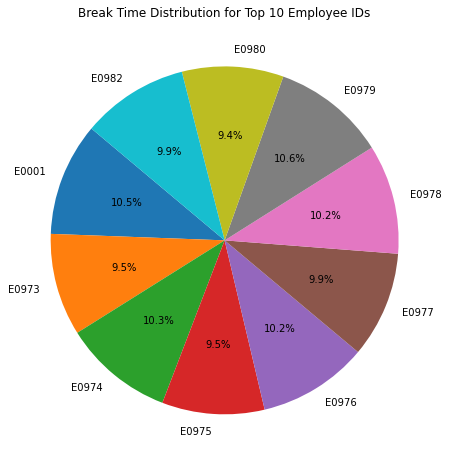

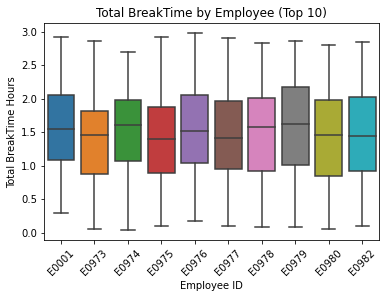

In [55]:


# Determine top 10 most frequent EmployeeIDs
top10_employee_ids = data['EmployeeID'].value_counts().nlargest(10).index

# Filter data for top 10 EmployeeIDs
data_top10 = data[data['EmployeeID'].isin(top10_employee_ids)]

# Aggregate break time for each employee
total_break_time_per_employee = data_top10.groupby('EmployeeID')['BreakTimeHours'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_break_time_per_employee, labels=total_break_time_per_employee.index, autopct='%1.1f%%', startangle=140)
plt.title('Break Time Distribution for Top 10 Employee IDs')
plt.show()

# Box plot of BreaktimeHours by EmployeeID for top 10 EmployeeIDs
sns.boxplot(x='EmployeeID', y='BreakTimeHours', data=data_top10)
plt.xlabel('Employee ID')
plt.ylabel('Total BreakTime Hours')
plt.title('Total BreakTime by Employee (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [68]:


# Group data by Date and aggregate Total Work Hours and Break Time Hours
grouped_data = data.groupby('Date').agg({'TotalWorkHours': 'sum', 'BreakTimeHours': 'sum'})

# Sort the table by Total Work Hours in descending order
sorted_table_total_work_hours = grouped_data.sort_values(by='TotalWorkHours', ascending=False)

# Sort the table by Break Time Hours in descending order
sorted_table_break_time_hours = grouped_data.sort_values(by='BreakTimeHours', ascending=False)

# Display sorted table for Total Work Hours
print("Sorted by Total Work Hours:")
sorted_table_total_work_hours





Sorted by Total Work Hours:


,TotalWorkHours,BreakTimeHours
Date,,
2023-06-15,11721.600000,2183.533333
2023-04-14,11717.383333,2231.483333
2023-03-27,11715.300000,2227.166667
2023-03-31,11715.050000,2172.416667
2023-03-22,11713.283333,2223.150000
...,...,...
2023-02-01,11648.283333,2227.816667
2023-02-21,11647.600000,2221.883333
2023-04-24,11645.366667,2167.250000


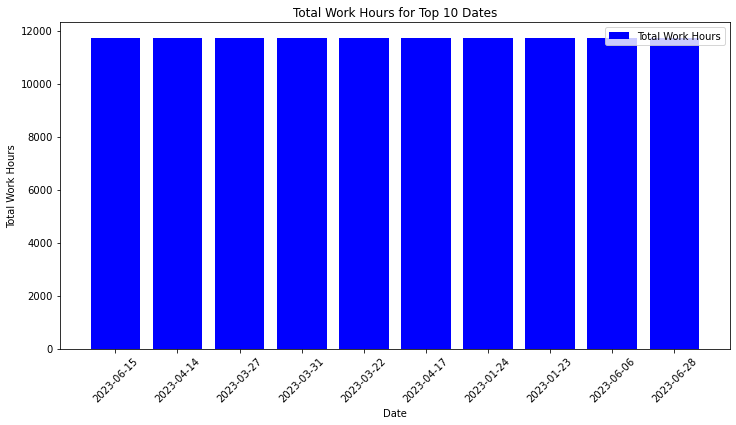

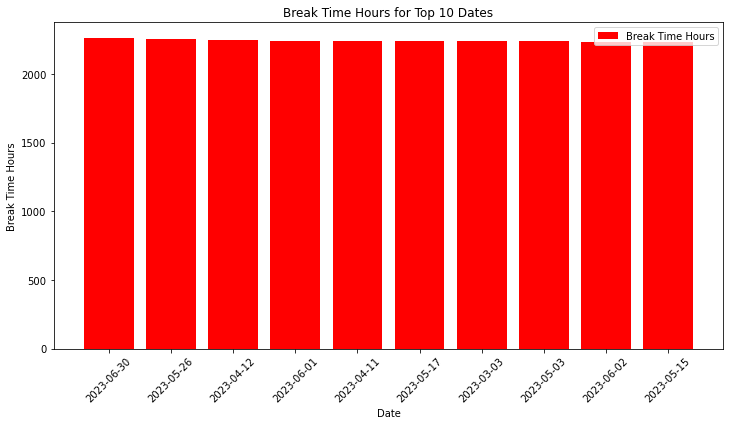

In [60]:


# Group data by Date and aggregate Total Work Hours and Break Time Hours
grouped_data = data.groupby('Date').agg({'TotalWorkHours': 'sum', 'BreakTimeHours': 'sum'})

# Select top 10 dates based on Total Work Hours
top10_dates_totalworkhours = grouped_data.nlargest(10, 'TotalWorkHours')

# Select top 10 dates based on Break Time Hours
top10_dates_breaktimehours = grouped_data.nlargest(10, 'BreakTimeHours')

# Plot Total Work Hours for top 10 dates
plt.figure(figsize=(12, 6))
plt.bar(top10_dates_totalworkhours.index, top10_dates_totalworkhours['TotalWorkHours'], color='blue', label='Total Work Hours')
plt.xlabel('Date')
plt.ylabel('Total Work Hours')
plt.title('Total Work Hours for Top 10 Dates')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Break Time Hours for top 10 dates
plt.figure(figsize=(12, 6))
plt.bar(top10_dates_breaktimehours.index, top10_dates_breaktimehours['BreakTimeHours'], color='red', label='Break Time Hours')
plt.xlabel('Date')
plt.ylabel('Break Time Hours')
plt.title('Break Time Hours for Top 10 Dates')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [55]:
data['TotalWorkingTime'] = data['EndTime'] - data['StartTime']
daily_total_working_time = data.groupby('Date')['TotalWorkingTime'].sum()
daily_total_working_time 


Date
2023-01-02   487 days 09:35:00
2023-01-03   486 days 09:47:00
2023-01-04   486 days 22:58:00
2023-01-05   486 days 17:46:00
2023-01-06   487 days 08:41:00
                    ...       
2023-06-26   486 days 06:02:00
2023-06-27   486 days 05:21:00
2023-06-28   487 days 20:49:00
2023-06-29   487 days 02:03:00
2023-06-30   486 days 11:03:00
Name: TotalWorkingTime, Length: 130, dtype: timedelta64[ns]

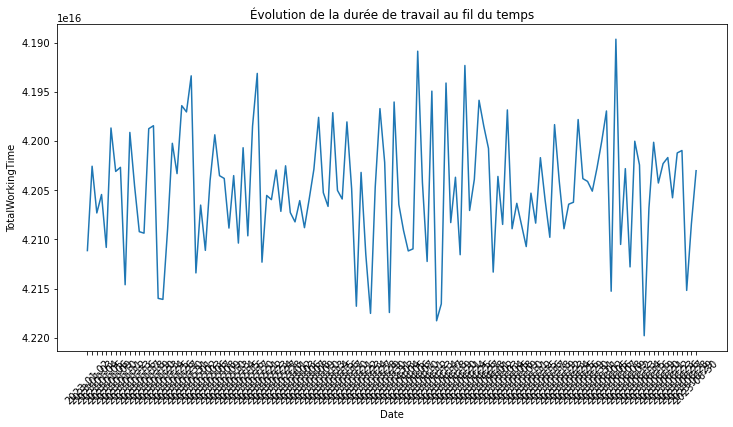

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_total_working_time.index, y=daily_total_working_time.values)
plt.title('Évolution de la durée de travail au fil du temps')
plt.xlabel('Date')
plt.ylabel('TotalWorkingTime')
plt.xticks(rotation=45)
plt.show()